# ЛА-Комп'ютерний практикум-06. Лінійні перетворення

In [1]:
# these imports may be useful

import pandas as pd
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from sympy import *  #module to do symbolic calculations
import matplotlib.animation
import networkx as nx

 #### Деякі інструменти, що стануть у нагоді 

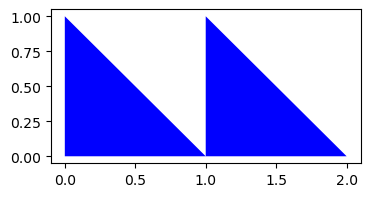

In [2]:
# these tools may be useful

# how to fill triangles (or other polygons) with the color 
x1 = np.array([0, 0, 1]) #(x, y) -- coordinates of vertices of the triangle
y1 = np.array([0, 1, 0])

x2 = np.array([1, 1, 2])
y2 = np.array([0, 1, 0])

fig = plt.figure(figsize=(4, 2))
ax = fig.gca()
ax.fill(x1, y1, 'b')
ax.fill(x2, y2, 'b')


In [3]:
# compute the eigenvalues and eigenvectors of a matrix
A = np.array([[1, 2], [2, 1]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'eigenvalues {eigenvalues}')
print(f'eigenvectors {eigenvectors}') # the columns are eigenvectors !

eigenvalues [ 3. -1.]
eigenvectors [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [4]:
# compute characteristic polynomial symbolically with sympy
M = Matrix([[1,0,0], [0,2,0], [0,0,3]])
lamda = symbols('lamda') #змінна, від якої буде многочлен
p = M.charpoly(lamda)
p

PurePoly(lamda**3 - 6*lamda**2 + 11*lamda - 6, lamda, domain='ZZ')

## Вправи

💻  **6.1. Із $a$ в $b$.** Нехай $\varphi$ -- лінійне перетворення в $\mathbb{R}^n$, яке має переводити вектори $a_1, a_2, \dots, a_n$ відповідно у вектори $b_1, b_2, \dots, b_n,$ тобто $\varphi(a_j)=b_j$ для $j=1, \dots, n$. Чи завжди таке перетворення існує? Напишіть функцію, яка за заданими координатами векторів $a_j$, $b_j$ в стандартному базисі знаходить матрицю $\varphi$ (також у стандартному базисі), або ж повідомляє, що шуканого перетворення не існує.

In [ ]:
#write your code here

💻  **6.2. Художник.** Намалюйте на площині квадрат із центром у точці $(0,0)$.
Розбийте його на 4 частини (по чотирьох чвертях) та заповніть їх точками чотирьох кольорів.

1. Поекспериментуйте з тим, на що перетвориться квадрат, якщо застосовувати до його точок різні лінійні перетворення: розтягування/стиснення (у тому числі з різними коефіцієнтами за осями), обертання, віддзеркалення відносно деякої осі. Якими матрицями задаються ці перетворення?

2. На що перетвориться квадрат, якщо лінійне перетворензаа) а) дано скалярною риб) б) цею, матрицегг в) в) у 1, верхньотрикутною матрицею?

3. Зробіть висновок: як може змінитися форма квадрата під впливом лінійних перетворень. 

In [ ]:
#write your code here

💻  **6.3. Просунутий художник.** Створіть нескладне анімоване зображення, в якому відбуватиметься обертання деякого об'єкта (стрілки годинника, сонця або зірок на небосхилі, фігурки на каруселі тощо). Використовуйте матрицю обертання для перетворення координат точок. Для анімації можна використовувати модуль matplotlib.animation.


In [ ]:
#write your code here

💻  **6.4. Фрактали.** У цій вправі ми використаємо лінійні перетворення для створення самоподібної структури -- фракталу -- а саме деякої версії трикутника Серпінського, названого так на честь польського математика [Вацлава Серпінського](https://en.wikipedia.org/wiki/Wac%C5%82aw_Sierpi%C5%84ski).

1️⃣ Намалюйте на площині трикутник з вершинами в точках $A(0,0)$, $B(1,0)$, $C(0,1)$. Також створіть $2\times 3 $ numpy-масив $ST$ (Sierpinski Triangle), стовпчики якого, міститимуть координати точок. Варто заповнити внутрішність трикутника кольором -- так вийде наочніше. Те, що ви намалювали -- це нульова (початковва) ітерація трикутника Серпінського.

In [5]:
#write your code here
ST = np.array([[0,0], [1,0], [0,1]]).T  # .T for columns to be points 

2️⃣ Створення фракталу відбувається за декілька кроків, на кожному з яких до кожного стовпчика масиву $ST$, тобто до кожної вершини $x$ трикутників, що утворюють фрактал, треба застосувати три перетворення: 

$F_a(x) = Ax$, де $A=\left(\begin{array}{cc} 0 & 0.5\\ 0.5 & 0 \end{array}\right)$.

$F_b(x) = Ax + b$ з тією самою $A$ і $b=\left(\begin{array}{c} 0.5 \\ 0  \end{array}\right)$. 

$F_c(x)= Ax + c$ з тією самою $A$ і $c=\left(\begin{array}{c} 0 \\ 0.5  \end{array}\right)$. 

Поясніть з точки зору геометрії, що робить кожне з цих перетворень. 

✔️ *Ваші міркування запишіть тут.*

Зверніть увагу, що застосувати перетворення $F_a$ до всіх вершин трикутника Серпінського одночасно можна, помноживши матрицю $A$ на матрицю $ST$. А для того, щоб застосувати перетворення $F_b$ достатньо помножити $A$ на $ST$ та додати вектор $b$ (він додасться до кожного стовпчика). Аналогічно для $F_c$.

Застосуйте всі перетворення. Від кожного перетворення ви отримаєте по три точки, отже, загалом вийде 3 трикутники на першій ітерації трикутника Серпінського. Подумайте, як заповнити їх кольором. Має вийти щось схоже на наступний малюнок

<img src='images\Sierpinski_triangle_ortho_1.png' width=240, heigth=240>

Також змініть масив $ST$ -- тепер він має містити 9 точок, деякі з яких співпадають.

In [ ]:
#write your code here

3️⃣ Продовжіть і зробіть ще кілька ітерацій трикутника Серпінського, щокроку, перетвороюючи кожен із старих трикутників на три нових, вдвічі менших. Подумайте, як заповнювати трикутники кольором. Наприклад, на другій ітерації має вийти щось схоже на наступний малюнок, а новий масив міститиме 27 точок. 

<img src='images\Sierpinski_triangle_ortho.png' width=240, heigth=240>


In [ ]:
#write your code here

4️ Створіть функцію, що обчислює точки трикутника Серпінського на заданій ітерації, а також функцію, що малює цей трикутник.

In [ ]:
#write your code here

💻  **6.5. Характеристичний многочлен.** Характеристичний многочлен квадратної матриці $A$ задається як $\chi(\lambda) = 
\det(A-\lambda I)$. Його корені є власними значеннями матриці  $A$. Поекспериментуйте зі знаходженням  $\chi(\lambda)$ для деяких матриць  $A$.

1.  Знайдіть характеристичний многочлен матриці за допомогою символьних обчислень (charpoly в пакеті sympy). Навчіться отримувати коефіцієнти цього многочлена.
2.  Знайдіть власні значення за допомогою чисельних методів (numpy.linalg.eig). Будьте уважні: вони можуть виявитися комплексними.
3.  Побудуйте за знайденими власними значеннями многочлен, коренями якого вони є. За допомогою символьних обчислень (модуль  poly з пакету sympy), або знайдіть коєфіцієнти за допомогою формул Вієта.
4. Протестуйте для різних матриць і порівняйте результати з пунктів 1 і 3.
5. Перевірте, чи виконується для знайдених вами многочленів і вихідної матриці теорема Гамільтона-Келі: $\chi(A)=0$ (тобто якщо підставити матрицю до її характеристичного многочлена та обчислити значення, то отримаємо нульову матрицю).
    

In [ ]:
#write your code here

## Задачі

In [ ]:
# import section

🧩 **6.6. Степеневий метод.** У цій задачі ми розглянемо один з чисельних методів знаходження максимального власного значення й відповідного власного вектора. На відміну від теоретичного метода, що передбачає факторизацію характеристичного многочлена (а отже, потенційно є дуже ресурсоємним), цей метод здійснює нескладні чисельні операції. Зазвичай його використовують для великих розріджених матриць. Наприклад, Google використовує його для ранжування сторінок в інтернеті (див. наступну задачу).

Ідею розглянемо на прикладі матриці $A$ порядку 2. Припустимо, що матриця має два дійсних різних власних значення: $\lambda_1$, $\lambda_2$, причому $|\lambda_1|>|\lambda_2|$, і відповідні власні вектори $v_1, v_2$. Тоді для довільного вектора $x$ ми можемо записати $x=x_1v_1+x_2v_2$, застосувати матрицю $A$ до обох частин й отримати $Ax=x_1\lambda_1v_1+x_2\lambda_2v_2.$ 

Будемо продовжувати множити на матрицю $A$ обидві частини рівності. На $k$-ому кроці отримаємо $A^kx= x_1\lambda_1^kv_1+x_2\lambda_2^kv_2$.

А поділивши обидві частини на $\lambda_1^k$, отримаємо $$\dfrac{A^kx}{\lambda_1^k}= x_1v_1+x_2\left(\dfrac{\lambda_2}{\lambda_1}\right)^kv_2 $$


1️⃣  
1. Поясніть, чому можна подати кожен вектор $x$ у вигляді $x=x_1v_1+x_2v_2$.
2. Поясніть за допомогою мат.індукції рівність для $A^kx$.
3. Зробіть висновок, до чого прямує права частина рівності для $\dfrac{A^kx}{\lambda_1^k}$ зі зростанням $k$ і чому.
4. Якщо матриця буде більшого порядку (тобто матиме більшу кількусть власних значень), чи зможемо ми зробити такий самий висновок? За яких умов?
 

✔️ *Ваші міркування запишіть тут.*

Отже, зі зростанням $k$  вектор $A^kx$ стає все ближчим до власного вектора, пропорційного $v_1$. Це означає, що ми можемо зробити певну кількість ітерацій множення матриці $A$ на довільний (випадковий) вектор $x$ й отримати наближення власного вектора, що відповідає максимальному власному значенню. Щоправда на кожному кроці модуль наближеного власного вектора може збільшуватися (якщо $\lambda_1>1$) або зменшуватися (якщо $\lambda_1<1$), призводячи до незручних значень координат власного вектора (занадто великих, або занадто малих). Для того, щоб позбутися таких ефектів, ітераційний процес виконують з одночасним нормуванням: $$x_{k+1}=\dfrac{Ax_k}{\|Ax_k\|}.$$

Також з того, що $A^{k}x\approx \lambda_1^{k}x_1v_1$, а $A^{k+1}x\approx \lambda_1^{k+1}x_1v_1$, випливає, що $\lambda_1$  приблизно дорівнює коефіцієнту пропорційності між сусідніми ітераціями: $x_{k+1} \approx \lambda_1x_k $, або ж $\lambda_1 \approx \dfrac{(x_k^t)Ax_k}{(x_k^t)x_k}$.  

2️⃣ Напишіть функцію, яка для дійсної квадратної матриці $A$ за допомогою степеневого методу шукає (нормований) власний вектор, що відповідає найбільшому за модулем власному значенню, а також це власне значення (будьте уважні -- власне значення може виявитися комплексним). Передбачте зупинку ітераційного процесу або по виконанні певної кількості операцій, або якщо різниця модулів векторів, знайдених на сусідніх ітераціях, стає меншою деякого порогового значення. Як початкове наближення, зазвичай, обирають вектор $x$, усі координати якого є однаковими.
Протестуйте функцію. Чи можете ви вказати випадки, коли степеневий метод не буде працювати?

In [ ]:
#write your code here

3️⃣ Як можна адаптувати цей метод для пошуку найменшого (за модулем) власного значення й відповідного власного вектора?

 ✔️ *Ваші міркування запишіть тут.*

4️ Якщо для випадкового вектора $x$, що ви обираєте його на початковому кроці, виявиться що він не містить компоненту, що відповідає власному вектору $v_1$ (тобто $x_1=0$), то яким буде результат ітераційного процесу степеневого методу? 

✔️ *Ваші міркування запишіть тут.*

🧩 **6.7. PageRank.** У цій задачі ми будемо розбиратися з тим, як Google ранжує web-сторінки, що відповідають певному запиту. За запитом пошукова система видає користувачу сторінки в певному порядку так, що сторінки на початку списку є найбільш релевантими, корисними й надійними джерелами інформації. Це відбувається завдяки тому, що система вміє присвоювати сторінкам певні ранги -- числа, що вказують на важливість, авторитетність сторінок -- за якими сторінки можна порівнювати між собою й сортувати за спаданням рангу. Алгоритм ранжування сторінок для Google вигадали 1996 року Larry Page та Sergey Brin, на той час аспіранти Стенфордського університету (див. їх [статтю](http://infolab.stanford.edu/~backrub/google.html) 1998 року).

Алгоритм спирається на уявлення про інтернет як про систему сторінок, що пов'язані між собою посиланнями, тобто моделлю інтернета є орієнтований граф. При цьому сторінки, на які посилається багато інших сторінок вважаються "важливими", а сторінки, на які майже немає посилань, такими, що не мають значущості. Уявляти собі ранг ("важливість") сторінки можна кількома еквівалентними способами. Нехай $v_1, v_2, \dots , v_N$ -- вершини моделі (вони відповідають сторінкам мережі), а $r_1, r_2, \dots , r_N$ -- їх ранги.

1. Якщо зі сторінки $A$ з рангом $r$ є посилання на $n$ інших сторінок, то $A$ рівномірно "делегує" свою важливість цим  $n$ сторінкам, кожній з яких дістається по $\frac{1}{n}r$ рангу.

2. Можна також уявити собі користувача-блукача, який випадковим чином переходить зі сторінки на сторінку, кожного разу обираючи (з однаковою ймовірністю) одне з посилань, що є на поточній сторінці. Тоді якщо на ресурсі є посилання на $n$ інших сторінок, то на кожну з них блукач потрапить зі ймовірністю $\frac{1}{n}$. Ранг сторінки визначається тим, яку долю часу проведе блукач на кожній сторінці (або ж частотою відвідування сторінки у припущенні, що блукання відбувається достатньо довго).

Обидва підходи призводить до того, що ранг $r_i$ кожної сторінки $v_i$ можна виразити через ранги її сусідів, а саме
$$r_i = \displaystyle\sum_{j: \ v_j\rightarrow v_i} \frac{r_j}{outdeg(v_j)},$$
де сума розглядається за тими $v_j$, що з них є посилання на $v_i$, а $outdeg(v_j)$ є вихідним степенем вершини $v_j$, тобто загальною кількістю ребер, що виходять з цієї вершини.


<img src='images\PageRankSample.png' width=600, heigth=400>

Наприклад, для графа, що його зображено вище ліворуч, орієнтовані ребра вказують на посилання сторінок (стрілка вказує на ту сторінку, на яку є посилання). На малюнку праворуч показано, яку частину свого рангу "делегують" сторінки тим  вершинам, на які вони посилаються. Наприклад, $r_1=r_3+\frac{1}{2}r_4$, оскільки $v_3$ посилається лише на $v_1$, а $v_4$ має два вихідні ребра.
Усі рівності для рангів разом можна записати у матричному вигляді. Якщо $r$ - вектор рангів, а 
$T=\displaystyle \begin{pmatrix}
0 & 0 & 1 & \frac{1}{2}\\
\frac{1}{3} & 0 & 0 & 0\\
\frac{1}{3} & \frac{1}{2} & 0 & \frac{1}{2}\\
\frac{1}{3} & \frac{1}{2} & 0 & 0
\end{pmatrix}$ - матриця переходів (або ж "делегування важливостей"), то має бути виконаною рівність $$r=Tr,$$
тобто шуканий вектор рангів $r$ - це власний вектор матриці $T$, який відповідає власному значенню 1. 

Чому в матриці $T$ існує власний вектор із власним значенням 1? Та ще й було б добре, щоб ранги мали невід'ємні значення. Справа в спеціальному вигляді матриці  $T$. За побудовою сума елементів кожного стовпця $T$ дорівнює 1 (такі матриці називаються стохастичними, або точніше стовпцево-стохастичними). [Теорема Фробеніуса-Перрона](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem) (яку ми не будемо обговорювати, але інформацію про яку нескладно знайти) для достатньо широкого класу таких матриць гарантує, що 1 є їх найбільшим за модулем власним значенням і що власний вектор можна обрати з невід'ємними компонентами. Зокрема, це означає, що шукати власний вектор рангів, що відповідає власному значенню 1 можна за допомогою степеневого метода (див. попередню задачу).

1️⃣ Для графа, що його наведено у прикладі вище, знайдіть власні значення й власні вектори матриці $T$ за допомогою вбудованих засобів. Чи є серед них власне значення 1? Чи є воно найбільшим за модулем? Яким має бути вектор рангів вершин? Знаючи, що 1  є власним значенням $T$, розрахуйте власний вектор рангів вручну, нормуйте його. Чи збігаються вектори, що їх знайшли ви та комп'ютер? 

In [ ]:
#write your code here

✔️ *Ваші міркування запишіть тут.*

У моделей мережі для обчислення рангу сторінок, що наведено вище, є певний недолік. Адже граф інтернету є величезним і може бути незв'язним. Наприклад, з точки зору моделі випадкового блукача це означає, що цей блукач може пересуватися лише в межах однієї компоненти зв'язності й ніколи не потрапить до інших. З точки зору лінійної алгебри це означає, що матриця переходів матиме кілька лінійно незалежних власних вектори, що відповідають значенню 1 і ми не зможемо обрати з них единий вектор рангів.  Для того щоб виправити ситуацію, модель (і відповідну матрицю) дещо змінюють.
А саме вважають, що на кожному кроці випадковий блукач обирає або переходити йому з поточної сторінки на якусь пов'язану за посиланням, або ж взагалі перестрибнути на якусь довільну сторінку в мережі (яка не обов'язково пов'язана з поточною). Ймовірність, з якою блукач обирає перший спосіб дій  позначають $d$ (damping number), відповідно, ймовірність стрибку на випадкову сторінку дорівнює $1-d$. Це означає, що матриця переходів $T$ перетворюється на нову матрицю $$G= d\cdot T+ (1-d)H_n,$$ де $n$ -- загальна кількість вершин графа, а $H_n$ -- матриця, усі елементи якої дорівнюють $1/n$ (адже з-поміж усіх сторінок випадковий блукач обирає одну з ймовірність $1/n$). Матрицю $G$ зазвичай називають Google-матрицею. Число $d$ є комерційною таємницею корпорації  Google, але вважається, що воно дорівнює $d=0.85$, також часто обирають $d$ між 0.85 і 0.99.

2️⃣ Зверніть увагу, що матриця $H_n$ також є стовпцево-стохастичною. Перевірте, що й матриця $G$ є стовпцево-стохастичною і що всі її елементи є додатними. До речі, для такого вигляду матриці теорема Фробеніуса-Перрона завжди гарантує, що 1 є найбільшим за модулем власним значенням кратності 1, і що відповідний власний вектор можна обрати з додатними компонентами.

✔️ *Ваші міркування запишіть тут.*

3️⃣ Напишіть функцію, що отримує на вхід орієнтований граф (networkx.Digraph),  й обчислює його Google-матрицю $G =d\cdot T+ (1-d)H_n$. Число $d$ також має бути параметром. Застосуйте функцію до графа з прикладу з $d=0.85$. Обчисліть ранги вершин графа.

In [ ]:
#write your code 

4️ Порівняйте ваші розрахунки з тими, що дають вбудовані засоби ([див.](https://networkx.org/documentation/stable/reference/algorithms/link_analysis.html) функціі google_matrix, pagerank у пакеті  networkx ) на тому ж графі з прикладу. Чим відрізняються результати? Зробіть висновки: яка з вершин графа має найбільший ранг, найменший. Чи можете ви пояснити, чому?

In [ ]:
#write your code 

✔️ *Ваші міркування запишіть тут.*